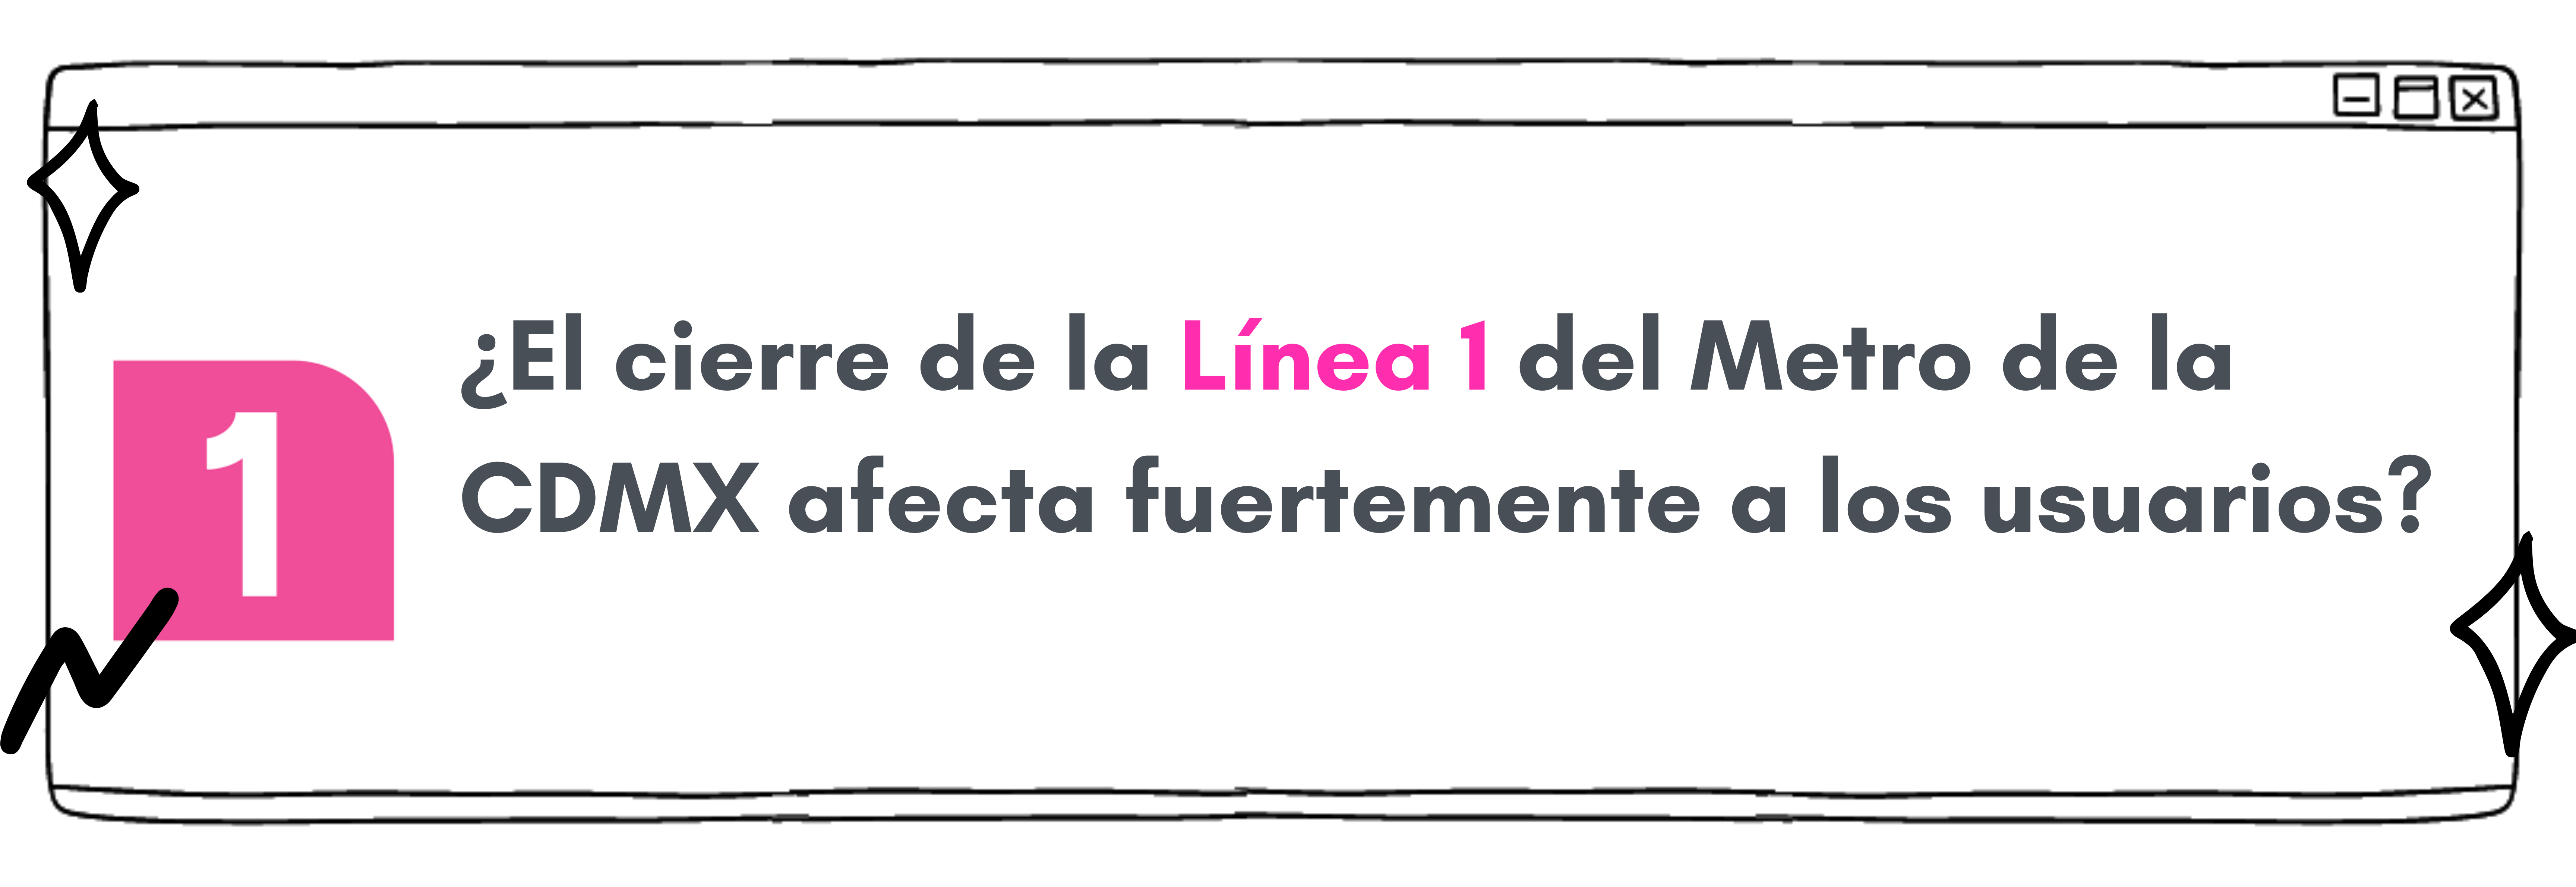

# Proyecto Movilidad. L√≠nea 1 Metro CDMX:

## Resumen

Con motivo del proyecto de [remodelaci√≥n y modernizaci√≥n](https://www.capital21.cdmx.gob.mx/noticias/?p=14612) del Metro de la CDMX, la L√≠nea 1 del Metro de la  Ciudad de M√©xico se encuentra cerrada temporalmente en el tramo que comprende de la terminal de *Pantitl√°n* a la estaci√≥n *Salto del Agua*, desde el 11 de julio de 2022.  

Se estima que estar√° cerrada 8 meses y que, en marzo de 2023, se dar√° inicio a la renovaci√≥n de las estaciones restantes(desde la terminal de *Observatorio* a la estaci√≥n *Balderas*), concluyendo, al fin, en agosto de 2023.  

El Metro es el medio de transporte m√°s importante de la Ciudad de M√©xico y la L√≠nea 1, usada diariamente por miles de habitantes, es una de las m√°s importantes... pero ¬øsabemos realmente cu√°nto? 

## Recursos

- Los Datos consultados para la elaboraci√≥n de este proyecto fueron publicados por el gobierno de esta entidad y pueden consultarse directamente en el [siguiente enlace](https://datos.cdmx.gob.mx/dataset/da3fcf80-f15f-4478-9795-26eddaa6fe86/resource/5d33f9c7-e033-4676-a02d-9e2129017acf/download/afluencia-preliminar-en-transporte-publico.xlsx-afluencia_diaria.csv).
- Versi√≥n de Python: 3.7
- Librer√≠as: Pandas, Plotly, Matplotlib, Seaborn

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
link = 'https://drive.google.com/file/d/1F0uobFz8Dcm0KLSO23l6Iwo5uoFHYzKk/view?usp=sharing'
id = '1F0uobFz8Dcm0KLSO23l6Iwo5uoFHYzKk'

archivo = drive.CreateFile({'id':id}) 
archivo.GetContentFile('afluencia-preliminar-en-transporte-publico.xlsx-afluencia_diaria.csv')  
data_afluencia = pd.read_csv('afluencia-preliminar-en-transporte-publico.xlsx-afluencia_diaria.csv')

## An√°lisis Exploratorio

En un primer vistazo, el DataFrame contiene las siguientes columnas:
- **id:** √çndice expl√≠cito
- **organismo:** Medio de transporte
- **dia:** D√≠a de la semana
- **fecha:** Fecha en formato calendario
- **afluencia_tarjeta:** Ingresos por tarjeta
- **afluencia_boleto:** Ingresos por boleto
- **afluencia_total_preliminar:** Ingresos totales

In [ ]:
data_afluencia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18714 entries, 0 to 18713
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          18714 non-null  int64 
 1   organismo                   18714 non-null  object
 2   linea_servicio              18225 non-null  object
 3   dia                         18714 non-null  object
 4   fecha                       18714 non-null  object
 5   afluencia_tarjeta           2687 non-null   object
 6   afluencia_boleto            3598 non-null   object
 7   afluencia_total_preliminar  18512 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.1+ MB


Las columnas con menos registros nulos son *id*, *organismo*, *d√≠a* y *fecha*; mientras que *afluencia_tarjeta* cuenta es la columna con menos informaci√≥n.

En la siguiente gr√°fica se pueden visualizar el porcentaje de datos nulos por columna:

In [ ]:
null_df = data_afluencia.isnull().sum() / len(data_afluencia) * 100
null_df = pd.DataFrame(null_df, columns= ['porcentaje']).reset_index().round(2)

fig = px.bar(
    null_df,
    title = 'Porcentaje de valores nulos por columna.', 
    height = 400, width = 700,
    x=null_df['index'], 
    y=null_df['porcentaje'],
    labels = {'index': '', 'porcentaje': 'Porcentaje'},
    color='porcentaje',
    color_continuous_scale = 'sunsetdark')
fig.update_layout(paper_bgcolor='light gray')
fig.show()

Es posible tambi√©n realizar un an√°lisis m√°s exhaustivo de las situaciones espec√≠ficas a cada organismo, por las que se espera que existan registros nulos:

E.g., no se espera que Ecobici tenga l√≠neas de servicio, dado que es un servicio de renta de bicicletas, ni afluencia por boleto o tarjeta al no funcionar con taquilla.

In [ ]:
def org_nulos (organismo: str):
  '''
  Recibe un organismo como par√°metro en formato de cadena y regresa como output una gr√°fica, donde se observa la distribuci√≥n de valores nulos
  en todas las columnas del DataFrame, dado el organismo.

  El eje X despliega cada columna, el eje Y muestra el porcentaje de valores nulos que contiene.

  e.g. org_nulos('Metrob√∫s')
  '''
  df = pd.DataFrame(data_afluencia[data_afluencia['organismo'] == organismo])
  fig= px.bar(x = df.columns, y = df.isnull().sum()/df.shape[0]*100,
              title = 'Porcentaje de valores nulos por organismo.', 
              height = 400, width = 700)
  fig.update_layout(paper_bgcolor='light gray')
  return fig.show()

In [ ]:
org_nulos('Ecobici')

Hay una gran cantidad de datos nulos, eliminarlos de tajo para trabajar con un DataFrame limpio es tentador, pero no es recomendable considerando la gran cantidad de informaci√≥n que se pierde:

In [ ]:
experimento_nulos = data_afluencia # Duplica el DataFrame para experimentar sin alterar el original
experimento_nulos = experimento_nulos.dropna(how = 'any')

p_experimento = experimento_nulos.shape[0] / data_afluencia.shape[0] * 100
p_experimento = round(p_experimento, 2)

print(f"El DataFrame conserva apenas el {p_experimento}% de sus registros")

El DataFrame conserva apenas el 14.35% de sus registros


No es conveniente descartar los registros con datos nulos, pero s√≠ explorar la posibilidad de que existan registros duplicados a eliminar antes de comenzar el an√°lisis.

In [ ]:
data_afluencia.duplicated().sum()

0

Por otra parte, es conveniente analizar si existen errores ortogr√°ficos que pudieran dejar fuera informaci√≥n relevante, antes de proseguir.

In [ ]:
conteo_mb = data_afluencia[data_afluencia['organismo'] == 'Metrob√∫s'].shape[0]

contiene_mb = data_afluencia[data_afluencia['organismo'].str.contains('etrob')].shape[0] # Omite el acento y la 'M' considerando registros en min√∫scula

print(f"Existen {conteo_mb} registros de Metrob√∫s y {contiene_mb} registros que contienen la palabra 'Metrob√∫s'")

Existen 3461 registros de Metrob√∫s y 3461 registros que contienen la palabra 'Metrob√∫s'


In [ ]:
data_afluencia['organismo'].unique()

array(['Ecobici', 'Metrob√∫s', 'RTP', 'STC', 'STE-Cableb√∫s',
       'STE-Tren Ligero', 'STE-Troleb√∫s', 'Suburbano'], dtype=object)

Es necesario dar formato adecuado a la *fecha* y convertir a valores num√©ricos (enteros, por fines pr√°cticos) todas las columnas de afluencia.

In [ ]:
data_afluencia['fecha'] = pd.to_datetime(data_afluencia['fecha'])

data_afluencia['afluencia_tarjeta'] = data_afluencia['afluencia_tarjeta'].str.replace(",", "")
data_afluencia['afluencia_boleto'] = data_afluencia['afluencia_boleto'].str.replace(",", "")
data_afluencia['afluencia_total_preliminar'] = data_afluencia['afluencia_total_preliminar'].str.replace(",", "")

data_afluencia['afluencia_tarjeta'] = pd.to_numeric(data_afluencia['afluencia_tarjeta']).fillna(value=0).astype(int)
data_afluencia['afluencia_boleto'] = pd.to_numeric(data_afluencia['afluencia_boleto']).fillna(value=0).astype(int)
data_afluencia['afluencia_total_preliminar'] = pd.to_numeric(data_afluencia['afluencia_total_preliminar']).fillna(value=0).astype(int)

In [ ]:
data_afluencia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18714 entries, 0 to 18713
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          18714 non-null  int64         
 1   organismo                   18714 non-null  object        
 2   linea_servicio              18225 non-null  object        
 3   dia                         18714 non-null  object        
 4   fecha                       18714 non-null  datetime64[ns]
 5   afluencia_tarjeta           18714 non-null  int64         
 6   afluencia_boleto            18714 non-null  int64         
 7   afluencia_total_preliminar  18714 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 1.1+ MB


Tras haber convertido las fechas al formato *datetime*, es posible aplicarles los atributos de este tipo de datos: weekday muestra el d√≠a de la semana, day el d√≠a del mes.    

In [ ]:
data_afluencia['fecha'].dt.weekday

0        6
1        0
2        1
3        2
4        3
        ..
18709    0
18710    1
18711    2
18712    3
18713    4
Name: fecha, Length: 18714, dtype: int64

In [ ]:
data_afluencia['fecha'].dt.day

0         1
1         2
2         3
3         4
4         5
         ..
18709    28
18710    29
18711    30
18712     1
18713     2
Name: fecha, Length: 18714, dtype: int64

El Sistema de Transporte Colectivo (Metro), enlistado como *STC*, es el organismo m√°s utilizado con un total de afluencia de 1,022,922,255. A su vez, la L√≠nea 1 del Metro es la m√°s utilizada, con una afluenci a total de 156,984,799.

Tienen tambi√©n los registros m√°s altos dentro de sus respectivas categorias.

In [ ]:
data_afluencia.groupby('organismo')['afluencia_total_preliminar'].agg(['sum','count', 'max']).sort_values('sum', ascending = False)

sum  count     max
organismo                                 
STC              1022922255   5868  874324
Metrob√∫s          301902718   3461  545082
RTP                90930827   3671  220754
STE-Troleb√∫s       44246028   4126   92150
Suburbano          32609321    489  197740
STE-Tren Ligero    12306738    489  105281
Ecobici             4672818    489   31855
STE-Cableb√∫s         385048    121    7897

In [ ]:
data_afluencia.groupby(['organismo', 'linea_servicio'])['afluencia_total_preliminar'].agg(['sum','count', 'max']).sort_values('sum', ascending = False)

sum  \
organismo       linea_servicio                                                 
STC             L1                                                 156984799   
                L2                                                 139362943   
                L3                                                 130511082   
                LB                                                 101715310   
Metrob√∫s        L1                                                  92624682   
STC             L8                                                  90264901   
                LA                                                  83532311   
                L12                                                 78835682   
                L9                                                  78760298   
                L7                                                  61453677   
                L5                                                  55510462   
RTP             Ordinario                                           45580256   
Metrob√∫s        L6                                                  43732564   
                L2                                                  42107954   
                L5                                                  39085904   
                L3                                                  38305228   
Suburbano       L1                                                  32609321   
STC             L6                                                  28156650   
Metrob√∫s        L7                                                  28028901   
RTP             Expreso                                             24647012   
STE-Troleb√∫s    L1 Eje Central                                      22888645   
STC             L4                                                  17834140   
Metrob√∫s        L4                                                  17415848   
STE-Tren Ligero Xochimilco-Tasque√±a                                 12306738   
RTP             Ecob√∫s                                               9181715   
                Atenea                                               4765065   
STE-Troleb√∫s    L4 Pto A√©reo-Rosario                                 4632121   
                L7 Lomas Estrella-CU                                 4558353   
RTP             SEFI Metro L√≠nea 12                                  3392169   
STE-Troleb√∫s    L2 Eje 2 sur                                         3123695   
                L3 Eje 7 Sur                                         2997578   
                L5 Sn Felipe-Hidalgo                                 2963173   
                L6 Rosario-Chapultepec                               2382278   
RTP             SEFI Metro                                           2159852   
STE-Troleb√∫s    L9 Iztacalco-Villa de Cort√©s                          624598   
Metrob√∫s        LT1 (Atlalilco-Tl√°huac)                               514385   
STE-Cableb√∫s    L1 Campos Revoluci√≥n-Tlalpexco                        385048   
RTP             Expreso Directo                                       368123   
                Nocturno                                              245724   
                Eco Atenea                                            186653   
                Temporal Zaragoza-Tacuba                              166094   
                Temporal Pe√±√≥n-Pante√≥n San Isidro-Metro Camarones     135717   
Metrob√∫s        LT2 (Coyuya-Tl√°huac)                                   87252   
STE-Troleb√∫s    L8 Circuito IPN                                        75587   
RTP             Temporal Tlalpan-Xochimilco                            52560   
                Temporal Viveros-Tetelpan                              49887   
STE-Troleb√∫s    Servicio apoyo Metro L√≠nea 12                              0   

                                                                   count  \
organismo       linea_servicio                     

En las l√≠neas de servicio hay enlistados servicios temporales, es conveniente corroborar si estos servicios conforman un porcentaje importante de las lineas a analizar. No es as√≠, con apenas 4 rutas temporales. 

In [ ]:
temp = data_afluencia[data_afluencia['linea_servicio'].str.contains('emporal', na=False)] # Omite la may√∫scula, considerando coincidencias en min√∫sculas
temp['linea_servicio'].nunique()

array(['Temporal Pe√±√≥n-Pante√≥n San Isidro-Metro Camarones',
       'Temporal Zaragoza-Tacuba', 'Temporal Tlalpan-Xochimilco',
       'Temporal Viveros-Tetelpan'], dtype=object)

Los martes son los d√≠as con m√°s afluencia en el transporte p√∫blico de la ciudad.

In [ ]:
data_afluencia.groupby('dia')['afluencia_total_preliminar'].agg(['sum','count', 'max']).sort_values('sum', ascending = False)

sum  count     max
dia                                
Martes     239477843   2681  820067
Jueves     238240944   2681  802291
Viernes    237182340   2681  874324
Lunes      228317986   2679  770843
Mi√©rcoles  202951991   2267  807048
S√°bado     197344970   2638  747252
Domingo    128866694   2674  454374
M√≠ercoles   37592985    413  303257

Las afluencia por tarjeta, por boleto y total se concentran en los valores m√°s bajos y se  distibuyen de la siguiente manera:

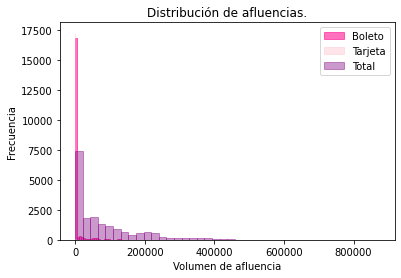

In [ ]:
plt.hist(data_afluencia['afluencia_boleto'], edgecolor='#FF1493', color='#FF1493', alpha=0.6, bins = 40, label='Boleto')
plt.hist(data_afluencia['afluencia_tarjeta'], edgecolor='pink', color = 'pink', alpha=0.4, bins = 40, label='Tarjeta')
plt.hist(data_afluencia['afluencia_total_preliminar'], edgecolor='purple', color = 'purple', alpha=0.4, bins = 40, label='Total')

plt.title('Distribuci√≥n de afluencias.')
plt.legend(loc='best')
plt.xlabel('Volumen de afluencia')
plt.ylabel('Frecuencia')
plt.show()

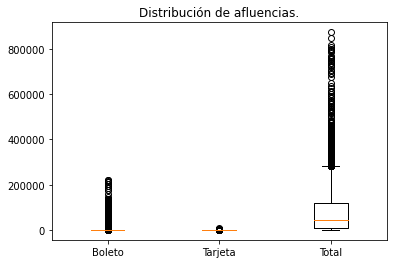

In [ ]:
data_1 = data_afluencia['afluencia_boleto']
data_2 = data_afluencia['afluencia_tarjeta']
data_3 = data_afluencia['afluencia_total_preliminar']
 
plt.boxplot([data_afluencia['afluencia_boleto'], data_afluencia['afluencia_tarjeta'], data_afluencia['afluencia_total_preliminar']],
            patch_artist = False, labels = ['Boleto', 'Tarjeta', 'Total'])
plt.title('Distribuci√≥n de afluencias.')
plt.show()

Para visualizar en un mapa de calor c√≥mo se distribuyen los registros entre cada organismo en cada d√≠a de la semana, es necesario reordenar los datos. As√≠, el Metro en viernes es la intersecci√≥n con mayor n√∫mero de usuarios.

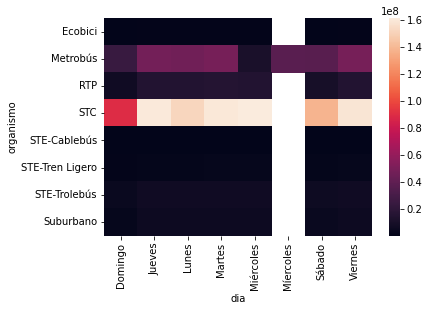

In [ ]:
dia_org = data_afluencia.groupby(['organismo', 'dia'], as_index = False).agg({'afluencia_total_preliminar': 'sum'})

heat_dia_org = dia_org.pivot(index = 'organismo', columns ='dia', values = 'afluencia_total_preliminar')
sns.heatmap(heat_dia_org)

Aqu√≠ se aprecia c√≥mo es que se distribuye la afluencia por organismos y l√≠neas, dejando clara la importancia de la L√≠nea 1 del Metro en el siguiente mapa de calor: 

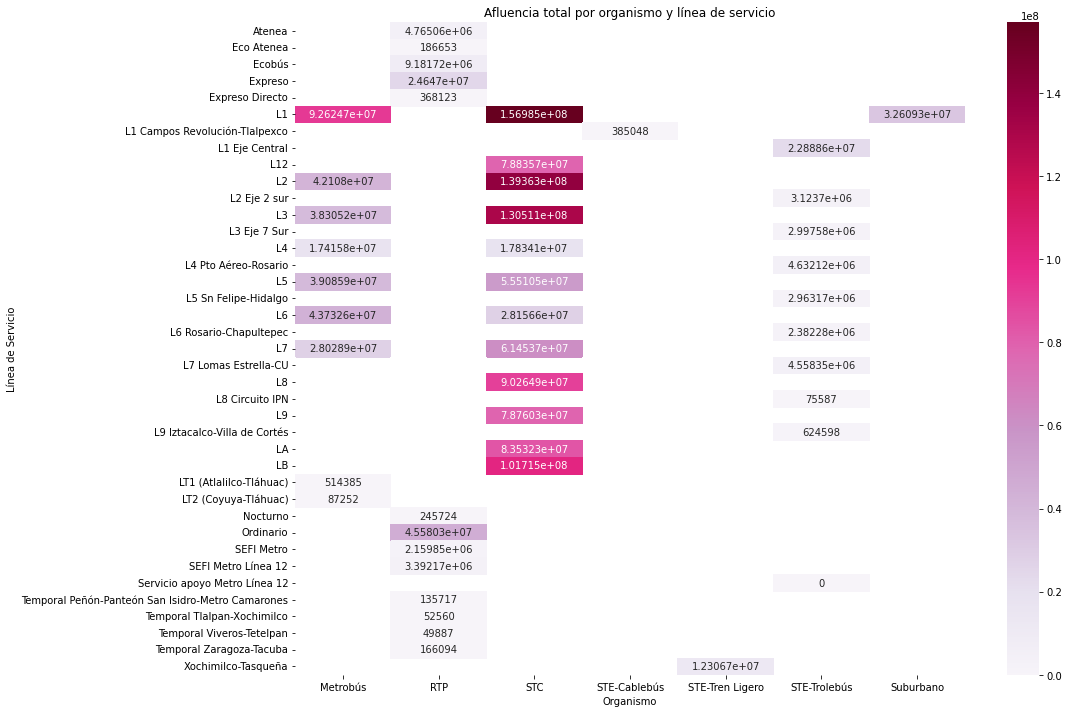

In [ ]:
linea_org = data_afluencia.groupby(['organismo', 'linea_servicio'], as_index = False).agg({'afluencia_total_preliminar': 'sum'}).sort_values(['afluencia_total_preliminar'],ascending=False)

plt.figure(figsize = (15,12))

heat_linea_org = linea_org.pivot(index = 'linea_servicio', columns ='organismo', values = 'afluencia_total_preliminar')
heat_linea_orgg = sns.heatmap(heat_linea_org, annot= True, cmap='PuRd', fmt='g')

heat_linea_orgg.set(xlabel='Organismo', ylabel='L√≠nea de Servicio', title = 'Afluencia total por organismo y l√≠nea de servicio')

heat_linea_orgg

Otra manera de visualizar esta informaci√≥n es directamente en los porcentajes de afluencia total de cada l√≠nea del Metro; la L√≠nea 1 encabeza la lista con un 15.35%

In [ ]:
linea_stc = data_afluencia[data_afluencia['organismo'] == 'STC']
linea_stc = linea_stc.groupby('linea_servicio')['afluencia_total_preliminar'].sum().sort_values(ascending=False)

linea_stc = linea_stc /linea_stc.sum().sum() * 100
linea_stc.round(2)

linea_servicio
L1     15.35
L2     13.62
L3     12.76
LB      9.94
L8      8.82
LA      8.17
L12     7.71
L9      7.70
L7      6.01
L5      5.43
L6      2.75
L4      1.74
Name: afluencia_total_preliminar, dtype: float64

Otro factor a considerar es que en marzo del 2020 se declar√≥ la emergencia sanitaria por Covid 19 en la Ciudad de M√©xico, promoviendo el que sus habitantes permanecieran en casa. Este fen√≥meno afect√≥ la afluencia de usuarios, como se puede ver a continuaci√≥n:

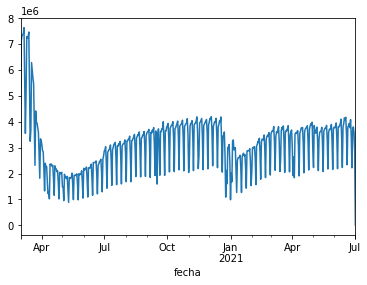

In [ ]:
data_afluencia.groupby('fecha')['afluencia_total_preliminar'].sum().plot()

Toda esta informaci√≥n es suficiente para poder asegurar sin lugar a duda la importancia de la L√≠nea 1 del Metro de la CDMX, esta vez con el respaldo de datos relevantes.
El cierre temporal de la L√≠nea 1 del Metro de la CDMX impactar√° fuertemente a sus usuarios.

Ha quedado claro el impacto del cierre temporal del Metro, afortunadamente Python, al ser un lenguaje orientado a objetos, puede ayudarnos con esto y darnos un metro que no est√© sujeto a ning√∫n cierre.
Este metro ilustrar√° todas las siguientes caracteristicas:

- M√©todos  
- Atributos  
- Herencia  
- Polimorfismo  
- Encapsulaci√≥n  

In [ ]:
class tren_metro:
  '''
  Esta clase define el comportamiento de un tren promedio en el STC de la Ciudad de M√©xico

  Sus atributos de clase son el peso y color. Estas caracter√≠sticas son compartidas por todo tren.
  Sus atributos de instancia son √∫nicos para cada objeto: l√≠nea, aceleraci√≥n y velocidad

  acelerar() modifica el atributo de velocidad del objeto al sumarle la aceleraci√≥n del tren
  frenar() modifica el atributo de velocidad del objeto al asignarle el valor de cero

  Ejemplo de utilizaci√≥n:
  tren_metro(1, 36)
  '''
  peso = 28.9 * 9 # Todo tren tiene 9 vagones, cada vag√≥n pesa 28.9 toneladas
  color = 'Naranja'

  def __init__(self, linea, aceleracion):
    self.linea = linea # Cada tren pertenece a una l√≠nea distinta
    self.aceleracion = aceleracion
    self.velocidad = 0

  def acelerar(self):
    self.velocidad = self.velocidad + self.aceleracion
    return self.velocidad

  def frenar(self):
    if self.velocidad > 0:
      self.velocidad = 0
    return self.velocidad

class tren_bala(tren_metro):
  '''
  Esta clase define el comportamiento de un tren bala s√∫per veloz basado en el STC de la Ciudad de M√©xico.

  Hereda el atributo de clase de color, mientras que su peso est√° disminuido en 10 T por vag√≥n. 
  Estas caracter√≠sticas son compartidas por todo tren bala; sus atributos de instancia son aceleraci√≥n y velocidad

  Hereda tambi√©n sus m√©todos de acelerar() y frenar():
  acelerar() modifica el atributo de velocidad del objeto al sumarle la aceleraci√≥n del tren
  frenar() modifica el atributo de velocidad del objeto al asignarle el valor de cero

  Ejemplo de utilizaci√≥n:
  tren_bala(36)
  '''
  peso = 18.9 * 9

  def __init__(self, aceleracion):
    self.aceleracion = aceleracion + 50
    self.velocidad = 0

In [ ]:
def freno_total(trenes): # Referencia a instancias de diferentes clases.
    for tren in trenes:
        tren.frenar()

if __name__ == '__main__':
    tren_metro = tren_metro('L1', 36)
    tren_bala = tren_bala(36)
    dos_trenes = [tren_metro, tren_bala]
    freno_total(dos_trenes)

# Hola, mi nombre es Sarah√≠ Sancliment üëã

## üöÄ Acerca de m√≠
Soy analista de datos en proceso, con experiencia en la investigaci√≥n acad√©mica en el √°rea de la Filosof√≠a y las Ciencias Sociales. Tengo el ojo bien puesto en llevar esos talentos al mundo de la programaci√≥n.

## üîó ¬øPlaticamos?
### sasn6970@protonmail.com 
#### (+52) 55-3247-2299
[![linkedin](https://img.shields.io/badge/linkedin-0A66C2?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/sara-sancliment-garcia-4336b1235/)
[![github](https://img.shields.io/badge/github-1DA1F2?style=for-the-badge&logo=github&logoColor=white)](https://github.com/sasn6970)